<div style="text-align:center;font-size:22pt; font-weight:bold;color:white;border:solid black 1.5pt;background-color:#1e7263;">
    Understanding Model Architecture Through Regression Practical Example
</div>

In [2]:
# ======================================================================= #
# Course: Deep Learning Complete Course (CS-501)
# Author: Dr. Saad Laouadi
# 
#
# ==========================================================
# Lesson: Model Specification for Neural Network with Keras 
#         API Implementation
# ==========================================================
# ## Learning Objectives
# This guide will enable you to:
# 1. Read Data
# 2. Build Regression Model Architecture
# 3. Understand the ins and out of Keras Model
# =======================================================================
#.          Copyright © Dr. Saad Laouadi 2024
# =======================================================================

In [1]:
# 1. Environment Setup
# ------------------
import os  
from pathlib import Path
from pprint import pprint                     # This will be used for printing dicts in a nicer format
# Disable Metal API Validation
os.environ["METAL_DEVICE_WRAPPER_TYPE"] = "0"

import numpy as np
import pandas as pd

# Import sympy of symbolic python
import sympy as sp

# from layers import the Input and Dense
from tensorflow.keras.layers import Input, Dense

# Import the Sequential Model
from tensorflow.keras.models import Sequential


print("="*72)

%reload_ext watermark
%watermark -a "Dr. Saad Laouadi" -u -d -m

print("="*72)
print("Imported Packages and Their Versions:")
print("="*72)

%watermark -iv
print("="*72)

# Configuration
DATA_PATH = Path("../../datasets/regression/wages.csv").resolve()

Author: Dr. Saad Laouadi

Last updated: 2024-12-03

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 24.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

Imported Packages and Their Versions:
pandas: 2.2.2
keras : 3.6.0
sympy : 1.13.3
numpy : 1.26.4



## Objectives

1. Import necessary tools
2. Read data
3. build Neural Network model architecture
   - Set the input
   - Set the hidden layers
   - set the output layer
   - Understand the model componens

In [2]:
# Read the data using pandas 
df = pd.read_csv(DATA_PATH)

# Check the Data Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wage_per_hour   534 non-null    float64
 1   union           534 non-null    int64  
 2   education_yrs   534 non-null    int64  
 3   experience_yrs  534 non-null    int64  
 4   age             534 non-null    int64  
 5   female          534 non-null    int64  
 6   marr            534 non-null    int64  
 7   south           534 non-null    int64  
 8   manufacturing   534 non-null    int64  
 9   construction    534 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 41.8 KB
None


In [3]:
# Check the data shape
print(df.shape)

(534, 10)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

{'build_input_shape': (None, 9),
 'dtype': {'class_name': 'DTypePolicy',
           'config': {'name': 'float32'},
           'module': 'keras',
           'registered_name': None},
 'layers': [{'class_name': 'InputLayer',
             'config': {'batch_shape': (None, 9),
                        'dtype': 'float32',
                        'name': 'input_layer',
                        'sparse': False},
             'module': 'keras.layers',
             'registered_name': None},
            {'build_config': {'input_shape': (None, 9)},
             'class_name': 'Dense',
             'config': {'activation': 'relu',
                        'bias_constraint': None,
                        'bias_initializer': {'class_name': 'Zeros',
                                             'config': {},
                                             'module': 'keras.initializers',
                                             'registered_name': None},
                        'bias_regularizer': None,
   

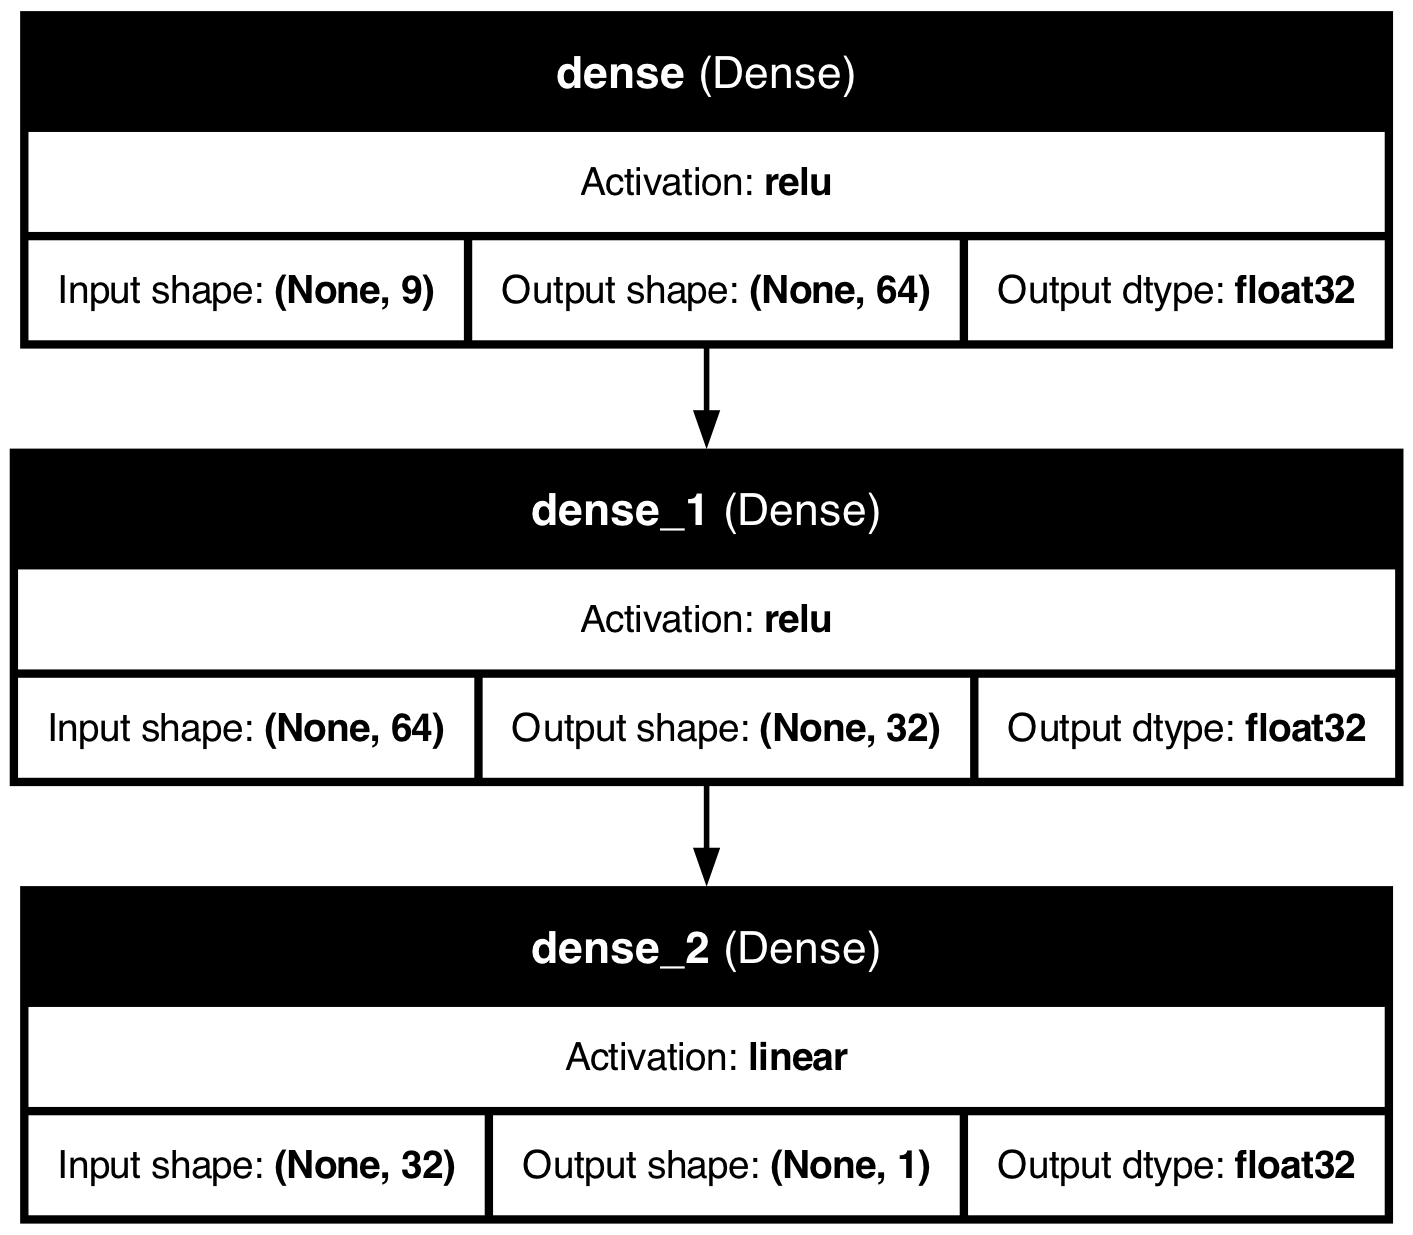

In [4]:
# Save the number of columns in predictors: n_features
n_features = df.shape[1]-1

# Instantiate a sequential model
model = Sequential()

# Add the input layer using the add method
model.add(Input(shape = (n_features, )))

# Add a fully connected layer with 64 hidden nodes and relu activation function
model.add(Dense(64, activation='relu'))


# Add the second layer with 32 nodes
model.add(Dense(32, activation = 'relu'))

# Add the output layer
model.add(Dense(1))


# check the model summary
model.summary()

# check the model configuration
pprint(model.get_config())

# Check the first hidden node model weights
print(model.get_weights()[0].shape)

# Get the number of layers
print(len(model.layers))

# Plot the model 
from tensorflow.keras.utils import plot_model
plot_model(model, 
          show_shapes=True,
           show_dtype=True,
           show_layer_names=True,
           expand_nested=True,
           show_layer_activations=True
          )

In [5]:
# =============================================================== #  
#              Get Model Information
# =============================================================== # 

# Get the model input shape
print(model.input_shape)

# Check the model whether it is built
print(model.built)                    # whether the input daga has been past

# Get the number of model weights
print(len(model.weights))

# Check the initialized weights of the first layer
print(model.weights[0].numpy()[0])

# Check the shape of weights of the second hidden layer
print(model.weights[2].shape)

# Get the biases of the first hidden layer
print(model.weights[1].numpy())

(None, 9)
True
6
[-0.09311877 -0.23302236 -0.25048724  0.2488502  -0.07326894 -0.06517115
  0.08581257 -0.15476827 -0.13337402 -0.10793848  0.26697615  0.22455624
  0.0374355   0.00542152 -0.2824388   0.19673103 -0.01903734 -0.28369513
 -0.04600984 -0.15376808  0.27704224 -0.01353237  0.05613905 -0.12133181
 -0.10426208  0.14156482 -0.12593468 -0.08317807  0.11152875  0.155658
  0.24509218  0.25887987  0.26427034 -0.04613225 -0.2748635  -0.0941103
  0.26247755 -0.1442221   0.08200678 -0.13730744  0.05108425 -0.20651452
 -0.01957855  0.03056401  0.03179121  0.16177863 -0.1151928   0.12669626
 -0.01630753  0.07571036  0.10131827  0.19539097 -0.08882235 -0.24591795
 -0.23478162  0.27861133 -0.24896708  0.18885612 -0.09300429 -0.28322276
 -0.23622994  0.09766299  0.02058423 -0.02698165]
(64, 32)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
